# OWEN'S SECOND COLLATZ PROGRAM
I have based this off of the idea that if the CC is proven for all odd numbers, it is proven for all even numbers. 
The integer plane has odd numbers along it's X axis, and Even numbers along it's Y axis. 

Setup: For all Y > 0, (X(n), Y(n)) = (X(n-1), 2\*Y(n-1))

The origin is at (0,0), which is 1.

    | 8 | 24 | 40 | 56 |
    | 4 | 12 | 20 | 28 |
    | 2 | 6  | 10 | 14 |
    | 1 | 3  | 5  | 7  |

Thus, if a coordinate has a Y coordinate > 0, the coordinate "falls" to (X(n), 0). The goal is to find a pattern in the movements between odd numbers. (Numbers in the X-Axis)


In [2]:
def isOdd(number):
    if (number%2 == 1): 
        return True
    else:
        return False

def getXY(number):
    X = number
    Y = 0
    while True:
        if (isOdd(X)):
            return (int((X-1)/2), Y)
        else:
            X = X / 2
            Y+=1

def getNumber(coordinate):
    return (2**coordinate[1])*((2*(coordinate[0])+1))


In [3]:
# Centralized class for automatically converting between coordinates and numbers

class Number():
    def __init__(self, a, b = None):
        if b != None:
            self.x = a
            self.y = b
            self.n = (2**b)*((2*a)+1)
            assert self.n > 0
            assert b >= 0, "Negative"
        else:
            self.x = -1
            self.y = -1
            self.n = a
        assert a >= 0, "Negative"
        
    
    def X(self):
        if self.x != -1:
            return self.x
        else:
            self._getCoords()
            return self.x
    
    def Y(self):
        if self.y != -1:
            return self.y
        else:
            self._getCoords()
            return self.y
    
    def N(self):
        return self.n
    
    def collatzNext(self):
        if (self.n % 2 == 1):
            return 3*self.n+1
        else:
            return self.n/2
    
    def collatzPrevEven(self):
        return self.n*2
    
    def collatzPrevOdd(self):
        a = (self.n - 1)/3
        if (a%1 == 0) and isOdd(a):
            return int(a)
        else:
            assert False, "No Odd Prev"
    
    def isJunction(self):
        try:
            self.collatzPrevOdd()
            return True
        except:
            return False
    
    def __str__(self):
        return str(self.n)
    
    def __repr__(self):
        return str(self.n)
    
    def _getCoords(self):
        if self.n == 1 or self.n == 0:
            self.x = 0
            self.y = 0
            return
        X = self.n
        Y = 0
        while True:
            if (isOdd(X)):
                self.x = (int((X-1)/2))
                self.y = Y
                break
            else:
                X = X / 2
                Y+=1
        return

a = Number(12)
b = Number(1, 2)
print("X", a.X(), "Y", a.Y(), "N", a.N())
print("X", b.X(), "Y", b.Y(), "N", b.N())


X 1 Y 2 N 12
X 1 Y 2 N 12


In [4]:
#Example
a = getXY(8)
b = getNumber(a)
print(a)
print(b)

(0, 3)
8


In [ ]:
#Here's what a more complete grid looks like
x_size = 20
y_size = 20
cell_size = 5

def padNumber(num):
    global cell_size
    number = num.N()
    numberLength = len(str(number))
    if (numberLength > cell_size):
        return "^"*cell_size
    numberOfSpaces = cell_size - numberLength
    return " "*numberOfSpaces+str(number)

def printGrid():
    global x_size, y_size, cell_size
    for y in reversed(range(y_size)):
        for x in range(x_size):
            theNumber = Number(x, y)
            print(padNumber(theNumber)+"|", end = "")
        print("")

printGrid()

# Junctions

Every number in the Collatz Plane points to exactly one other number, but a single number can be pointed to by either one or two numbers. Let's define some terminology:

* The number we are looking at is a _parent_
* The number that the parent points to is a _child_
* The number(s) that points to the parent are it's _grandparents_


1. Since all numbers are either even or odd, and one routing rule exists for odd numbers, and one routing rule exists for even numbers, all parents have exactly one child.
2. Since any number can be multiplied by 2, every parent has one even gradparent.
3. There exist a set of numbers such that (n-1)/3 is a whole number, and thus some parents have odd grandparents.

A parent that has two grandparents is a _junction_.

In [11]:
def isJunction(number):
    a = ((number-1)/3)
    if a%1 == 0 and isOdd(a):
        return True
    else:
        return False

# All Number Class Instances have an isJunction method.

print(isJunction(10))
print(isJunction(8))

True
False


In [7]:
# Let's correllate junctions to thier X-positions

def getListOfJunctionXs(numberOfJunctionXs):
    junctions = getListOfJunctions(numberOfJunctionXs)
    toReturn = []
    for i in junctions:
        theNumber = Number(i.X())
        toReturn.append(theNumber)
    return toReturn

getListOfJunctionXs(20)

[0, 0, 3, 2, 6, 0, 9, 5, 12, 3, 15, 8, 18, 2, 21, 11, 24, 6, 27, 14]

In [8]:
#Let's create a new graph which displays junctions

x_size = 20
y_size = 20
cell_size = 5

def padNumberJunction(number):
    global cell_size
    numberLength = len(str(number))
    numberOfSpaces = cell_size - numberLength
    
    if (number.isJunction()):
        if (numberLength > cell_size-1):
            return "*"+"^"*(cell_size-1)
        else:
            return "*"+" "*(numberOfSpaces-1)+str(number)
    if (numberLength > cell_size):
        return "^"*cell_size
    return " "*numberOfSpaces+str(number)

def printGridJunction():
    global x_size, y_size, cell_size
    for y in reversed(range(y_size)):
        for x in range(x_size):
            theNumber = Number(x, y)
            print(padNumberJunction(theNumber)+"|", end = "")
        print("")

printGridJunction()

^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|
*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|
^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|
*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|
32768|98304|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|
*^^^^|49152|81920|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|
 8192|24576|*^^^^|57344|73728|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|
*4096|12288|20480|*^^^^|36864|45056|*^^^^|61440|69632|*^^^^|86016|94208|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|^^^^^|*^^^^|^^^^^|
 2048| 6144|*^^^^|14336|18432|*^

From the above, we can make several immediate observations:

1. No junctions are a multiple of three. This makes sense because if a number is a multiple of three, and one is subtracted from that number, it can no longer be a multiple of three. Our test for being a junction is that if a number minus one is divisible by three it is a junction, since this can never be true of a multiple of three, no multiple of three can be a junction.
2. If (A, B) is a junction, (A-3, B) and (A+3, B) are both junctions. ((A-2, B), (A-1, B), (A+1, B), and (A+2, B) are NOT junctions)
3. If (A, B) is a junction, (A, B+2) and (A, B-2) are both junctions, and neither (A, B+1) or (A, B+1) are junctions.
4. If (A, 0) is a junction, (A-1, 1) is a junction.

In [9]:
#I want to see the Odd Grandparents of all Junctions for a given X.

def getOddGrandparents(X, numberOfResults):
    if X%3 == 0:
        first_junction = Number(X, 0)
    elif X%3 == 2:
        first_junction = Number(X, 1)
    else:
        assert False, "That has no junctions"
    
    toReturn = []
    for i in range(numberOfResults):
        current_junction = Number(first_junction.X(), first_junction.Y()+(2*i))
        oddGrandparent   = Number(int((current_junction.N()-1)/3))
        if oddGrandparent.N() == 0:
            continue
        toReturn.append(oddGrandparent)
    return toReturn

def padOddChart(string, maxSize):
    lengthOfString = len(string)
    if maxSize < lengthOfString:
        return string[0:maxSize-3]+"..."
    else:
        return " "*(maxSize-lengthOfString)+string

def printOddChart(upto, entries, space = 10):
    print(padOddChart("Number", space)+"|"+padOddChart("Goes to", space)+"|"+padOddChart("Accepts", space))
    print(("-"*10+"|")*3)
    for i in range(upto+1):
        theNumber = Number(i, 0)
        nextNumber = Number(theNumber.collatzNext())
        nextX = nextNumber.X()
        try:
            acceptors = [i.X() for i in getOddGrandparents(theNumber.X(), entries)]
        except:
            acceptors = "None"
        print(padOddChart(str(theNumber.X()), space)+"|"+padOddChart(str(nextX), space)+"|"+str(acceptors))

printOddChart(10, 5)

    Number|   Goes to|   Accepts
----------|----------|----------|
         0|         0|[0, 2, 10, 42]
         1|         2|None
         2|         0|[1, 6, 26, 106, 426]
         3|         5|[0, 4, 18, 74, 298]
         4|         3|None
         5|         8|[3, 14, 58, 234, 938]
         6|         2|[0, 8, 34, 138, 554]
         7|        11|None
         8|         6|[5, 22, 90, 362, 1450]
         9|        14|[1, 12, 50, 202, 810]
        10|         0|None


After a good deal of eyeballing, I came up with a relationship between an X position and the numbers it accepts. "X" is of course the X position that you want to look at, and "i" is the number of the acceptor that youwant to retrieve.

In [13]:
%%latex
\begin{equation}
\left \{
    \begin{tabular}{cc|cc}
        &  $\frac{4}{3}x+(2x+1)\sum_{j=1}^i {2^{2j+1}}$ & $x\%3 = 0, i \neq 0 $\\
        &  $\frac{4}{3}x$ & $x\%3 = 0, i = 0$\\
        &  $(2(\frac{x+1}{3}-1)+1)+(2x+1)\sum_{j=1}^i {4^{2j}}$ & $x\%3 = 2, i \neq 0 $\\
        &  $(2(\frac{x+1}{3}-1)+1)$ & $x\%3 = 2, i = 0 $\\
        &  \emph{Error} & $x\%3 = 1 $\\
    \end{tabular}
\right \}
\end{equation}

<IPython.core.display.Latex object>

Since the code above doesn't work [(even though it should)](https://nbviewer.jupyter.org/github/ipython/ipython/blob/2.x/examples/Notebook/Display%20System.ipynb#LaTeX) here is what the equation looks like. (I'm not good at LaTeX... I literally learned it to make this equation. Are you hapy? Huh?)

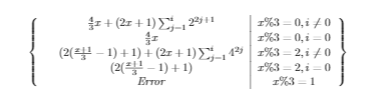

In [12]:
from IPython.display import Image
i = Image(filename='equation.png')
i

# Horizontal Shifts

Quick aside: We know how to find the number result of a vertical shift on the integer plane (multiply or divide by two), but what about a horizontal shift? The answer is actually pretty easy.

If we have a number e\*m, where e is (purely) even and m is (purely) odd, a horizontal shift can be represented as e\*(m+2), since a horizontal shift is equivalent to incrementing the largest odd factor by 2. Then, we can do:

e\*(m+2)

em+2e

Of course, this is slightly self-referential because it requires you to know the purely even factor ahead of time, which is just one step from finding the Y coordinate of the number, but it is still nice to have.

In [1]:
def horizontalShift(e, m, by):
    return (e*m)+(e*2*by)
